In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import snow_degree_day 

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/framework/
parent_dir    = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/
examples_dir  = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/examples/
__file__      = topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


In [3]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_snow_degree_day.cfg'
m=snow_degree_day.snow_component()

In [4]:
m.P_snow=0.02
m.rho_H2O=1000 # density of water kg/m3
m.T_air=10
m.initialize(cfg_file);
m.get_current_time()

 
Snow component: Initializing...
Imported netCDF4 version: 1.1.9


/Users/elja0262/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array(0.0)

In [5]:
time = [m.get_current_time().copy()]
# NOTE: EMELI does not have get_value
vol_SM = [m.get_values('snowpack__domain_time_integral_of_melt_volume_flux').copy()]
h_snow = [m.get_values('snowpack__depth').copy()] 
h_swe = [m.get_values('snowpack__liquid-equivalent_depth').copy()]
SM = [m.get_values('snowpack__melt_volume_flux').copy()]
rho_swe = [m.get_values('snowpack__z_mean_of_mass-per-volume_density').copy()]

print vol_SM, m.get_current_time(), m.get_end_time()
while m.get_current_time() < m.get_end_time():
    m.update()
    time.append(m.get_current_time().copy())
    vol_SM.append(m.get_values('snowpack__domain_time_integral_of_melt_volume_flux').copy() )
    h_snow.append(m.get_values('snowpack__depth').copy() )
    h_swe.append(m.get_values('snowpack__liquid-equivalent_depth').copy() )
    SM.append(m.get_values('snowpack__melt_volume_flux').copy() )
    rho_swe.append(m.get_values('snowpack__z_mean_of_mass-per-volume_density').copy() )
    
print time, vol_SM, h_snow

[array(0.0)] 0.0 36000.0
[array(0.0), array(3600.0), array(7200.0), array(10800.0), array(14400.0), array(18000.0), array(21600.0), array(25200.0), array(28800.0), array(32400.0), array(36000.0)] [array(0.0), array(1317.789), array(2635.578), array(3953.367), array(5271.156), array(6588.945), array(7906.7339999999995), array(9224.523), array(10542.312), array(11860.101), array(13177.890000000001)] [array(0.5), array(240.49617500000002), array(480.49235000000004), array(720.488525), array(960.4847), array(1200.480875), array(1440.47705), array(1680.473225), array(1920.4694), array(2160.465575), array(2400.46175)]


In [6]:
np.shape(vol_SM), np.shape(h_snow), np.shape(h_swe), np.shape(SM)

((11,), (11,), (11,), (11,))

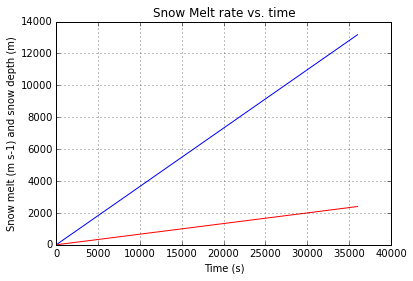

In [7]:
plt.plot(time,vol_SM,'b',time,h_snow,'r'); 
plt.xlabel('Time (s)')
plt.ylabel('Snow melt (m s-1) and snow depth (m)')
plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()

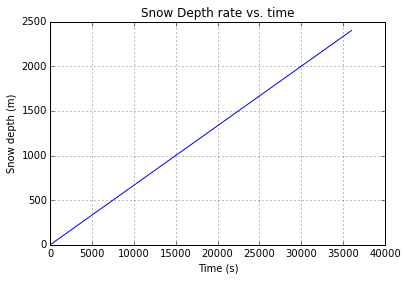

In [8]:
plt.plot(time,h_snow); 
plt.xlabel('Time (s)')
plt.ylabel('Snow depth (m)')
plt.title('Snow Depth rate vs. time')
plt.grid(); plt.show()

In [9]:
h_snow

[array(0.5),
 array(240.49617500000002),
 array(480.49235000000004),
 array(720.488525),
 array(960.4847),
 array(1200.480875),
 array(1440.47705),
 array(1680.473225),
 array(1920.4694),
 array(2160.465575),
 array(2400.46175)]